In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/daily-min-temperatures")

print("Path to dataset files:", path)

In [21]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sb

import tensorflow.keras as keras 

In [2]:
df = pd.read_csv("daily-min-temperatures.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [26]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()

scaled = ss.fit_transform(df["Temp"].values.reshape(-1,1)) 
scaled

array([[2.33888328],
       [1.65113873],
       [1.87219948],
       ...,
       [0.5703973 ],
       [1.11076801],
       [0.44758577]])

In [27]:
N = 30
n = len (df) 
temps = scaled  
X = [] 
Y = [] 
for i in range(0,n-N): 
    x = temps[i:i+N] 
    X.append(x) 
    Y.append(temps[i+N]) 

In [37]:
model = keras.Sequential() 

model.add(keras.layers.Input((N,1))) 
model.add(keras.layers.SimpleRNN(64,activation="tanh")) 
model.add(keras.layers.Dense(1,activation="sigmoid")) 
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1,activation="sigmoid")) 

model.compile(optimizer="adam", metrics=["mae"], loss="mse") 
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,291 (16.76 KB)

 Trainable params: 4,291 (16.76 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
X = np.array(X) 
Y = np.array(Y) 
print(X.shape, Y.shape)
history = model.fit(
    X, 
    Y, 
    epochs=20, 
    verbose=1,
    batch_size=32,
    validation_split=0.1
)

(3620, 30, 1) (3620, 1)
Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2598 - mae: 0.9122 - val_loss: 1.0070 - val_mae: 0.8260
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1977 - mae: 0.8840 - val_loss: 0.9567 - val_mae: 0.7982
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1729 - mae: 0.8731 - val_loss: 0.9370 - val_mae: 0.7933
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1436 - mae: 0.8616 - val_loss: 0.9122 - val_mae: 0.7821
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1212 - mae: 0.8521 - val_loss: 0.8905 - val_mae: 0.7725
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0969 - mae: 0.8410 - val_loss: 0.8706 - val_mae: 0.7639
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0677 - mae: 0.8264 - val_loss: 0.8495 - val_mae: 0.7520
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0537 - mae: 0.8226 - val_loss: 0.8318 - val_mae: 0.7438
Epoch 9/20
102/102 ━━━━━━━━━━━━━

In [34]:
score,acc = model.evaluate(X,Y) 
print(score,acc)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6111 - mae: 0.5790 
0.6110650897026062 0.5789808630943298


In [35]:
print(history.history)

{'loss': [0.7150363326072693, 0.7066994905471802, 0.704861044883728, 0.7009175419807434, 0.7004448771476746, 0.6986665725708008, 0.6989629864692688, 0.6947665810585022, 0.6937073469161987, 0.6938281655311584, 0.6914374828338623, 0.6905410885810852, 0.6884362697601318, 0.6866044402122498, 0.6837884783744812, 0.6844121813774109, 0.6803858876228333, 0.6818548440933228, 0.6798053979873657, 0.674860417842865, 0.6713290214538574, 0.6725869178771973, 0.6681950688362122, 0.667104959487915, 0.6652136445045471, 0.6625942587852478, 0.6589183211326599, 0.6573337316513062, 0.6541795134544373, 0.6553884148597717, 0.6544276475906372, 0.6516463756561279, 0.6497724652290344, 0.6472733616828918, 0.6415688991546631, 0.6433204412460327, 0.6398690938949585, 0.6382155418395996, 0.6431369185447693, 0.6394756436347961, 0.6334641575813293, 0.6362680792808533, 0.6344896554946899, 0.6278911232948303, 0.6276018619537354, 0.6257844567298889, 0.6282620429992676, 0.6298508644104004, 0.6325237154960632, 0.62874430418

<Axes: >

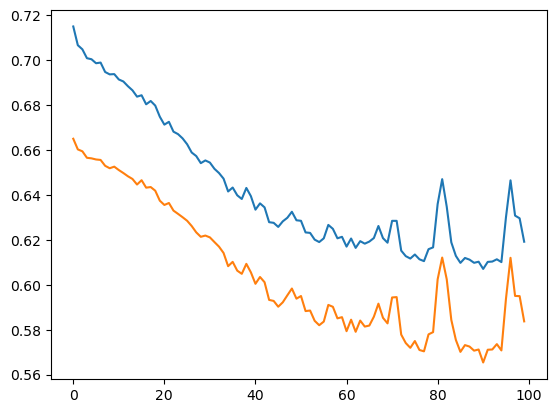

In [36]:
sb.lineplot(history.history["loss"]) 
sb.lineplot(history.history["mae"]) 